In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [7]:
players_info_df_list = utils.get_dataframes_csv_file('../scraping/csv/players_infos')

In [8]:
total_players = 0
total_seasons = len(players_info_df_list)

for dataframe in players_info_df_list:
    total_players += len(dataframe)

average_players_per_season = total_players / total_seasons

print("Total seasons:", total_seasons)
print("Total players:", total_players)
print("Average players per season:", average_players_per_season)
print("\n")

Total seasons: 78
Total players: 24561
Average players per season: 314.88461538461536




In [9]:
# Combinez tous les dataframes en un seul dataframe
combined_df = pd.concat(players_info_df_list, ignore_index=True)

total_players = 0
total_seasons = len(players_info_df_list)

for dataframe in players_info_df_list:
    total_players += len(dataframe)

average_players_per_season = total_players / total_seasons

print("Nombre total de saisons :", total_seasons)
print("Nombre total de joueurs :", total_players)
print("Nombre moyen de joueurs par saison :", average_players_per_season)

# Affichez le nombre d'équipes et de joueurs différents
unique_teams = combined_df['Teams'].nunique()
unique_players = combined_df['Player'].nunique()
print("Nombre d'équipes différentes :", unique_teams)
print("Nombre de joueurs différents :", unique_players)



Nombre total de saisons : 78
Nombre total de joueurs : 24561
Nombre moyen de joueurs par saison : 314.88461538461536
Nombre d'équipes différentes : 809
Nombre de joueurs différents : 4851


### Analyse de la répartition des positions des joueurs :

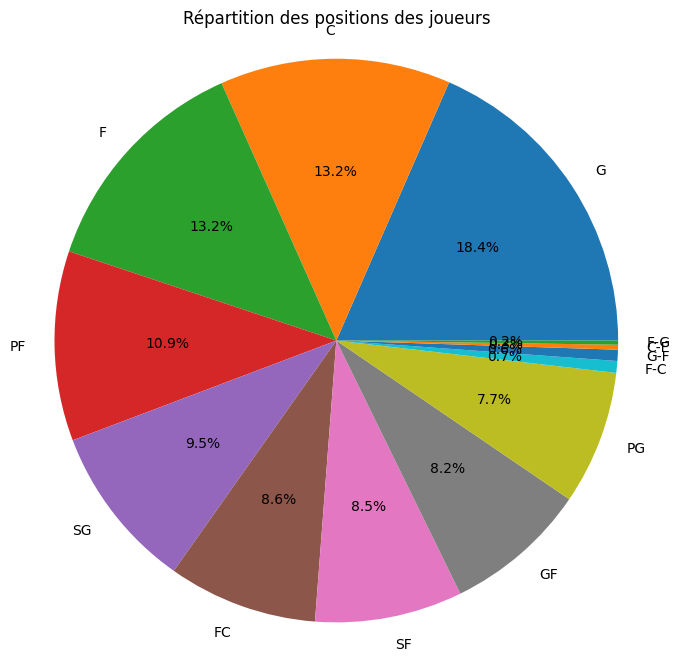

In [10]:
# Calculez le nombre de joueurs par position
position_counts = combined_df['Pos'].value_counts()

# Tracez le diagramme circulaire des positions des joueurs
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Répartition des positions des joueurs')
plt.axis('equal')
plt.show()

### Analyse de la taille et du poids des joueurs :


Statistiques du poids (WT) des joueurs :
 count    24535.000000
mean        96.943625
std         12.213632
min         60.327785
25%         86.636143
50%         97.522360
75%        104.779837
max        161.025291
Name: WT, dtype: float64


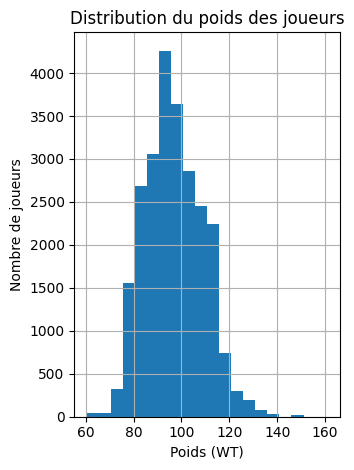

In [11]:
# Convertir les colonnes de poids de livres (pound) en kilogrammes (kg)
combined_df['WT'] = pd.to_numeric(combined_df['WT'], errors='coerce')
combined_df['WT'] = combined_df['WT'].apply(lambda x: x * 0.45359237 if x >= 0 else None)

# Analyse descriptive de la taille (HT) et du poids (WT)
weight_stats = combined_df['WT'].describe()

print("\nStatistiques du poids (WT) des joueurs :\n", weight_stats)

# Visualisation de la distribution de la taille et du poids des joueurs

plt.subplot(1, 2, 2)
combined_df['WT'].hist(bins=20)
plt.xlabel('Poids (WT)')
plt.ylabel('Nombre de joueurs')
plt.title('Distribution du poids des joueurs')

plt.tight_layout()
plt.show()

Statistiques de la taille (HT) des joueurs :
 count    24561.000000
mean       199.330898
std          9.888501
min          0.000000
25%        193.040000
50%        200.660000
75%        205.740000
max        231.140000
Name: HT, dtype: float64


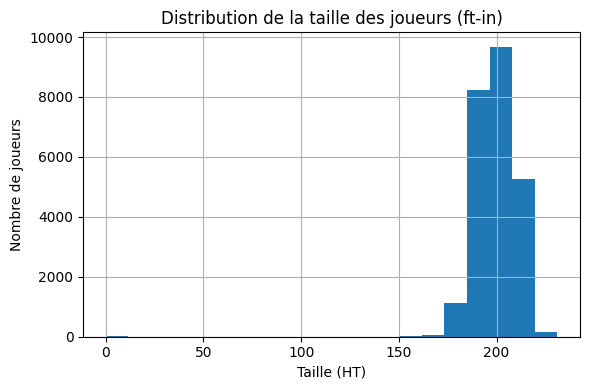

In [12]:
# Fonction pour convertir les mesures de pieds et pouces (ft-in) en centimètres (cm)
def convert_to_cm(height):
    if pd.isnull(height):
        return None
    else:
        feet, inches = height.split("-")
        if feet == '':
            feet = 0
        if inches == '':
            inches = 0
        feet = int(feet)
        inches = int(inches)
        cm = feet * 30.48 + inches * 2.54
        return cm

# Convertir la colonne de taille (HT) en mesures de pieds et pouces (ft-in)
combined_df['HT'] = combined_df['HT'].apply(convert_to_cm)

# Analyse descriptive de la taille (HT)
height_stats = combined_df['HT'].describe()

print("Statistiques de la taille (HT) des joueurs :\n", height_stats)

# Visualisation de la distribution de la taille des joueurs
plt.figure(figsize=(6, 4))
combined_df['HT'].hist(bins=20)
plt.xlabel('Taille (HT)')
plt.ylabel('Nombre de joueurs')
plt.title('Distribution de la taille des joueurs (ft-in)')

plt.tight_layout()
plt.show()

### Analyse de l'âge des joueurs :

Statistiques de l'âge des joueurs :
 count     24561
unique       29
top          24
freq       2802
Name: Age, dtype: object


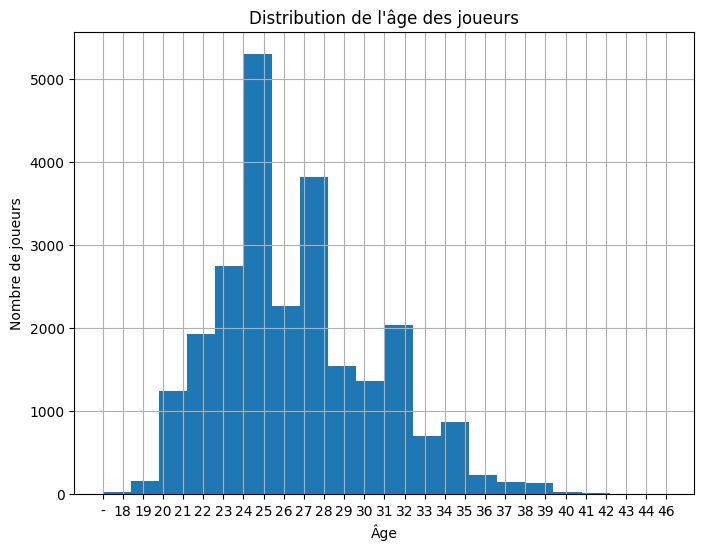

In [13]:
# Convertir la colonne de l'âge (Age) en chaînes de caractères
combined_df['Age'] = combined_df['Age'].astype(str)

# Analyse descriptive de l'âge des joueurs
age_stats = combined_df['Age'].describe()

# Tri des âges du plus petit au plus grand
combined_df = combined_df.sort_values('Age')

print("Statistiques de l'âge des joueurs :\n", age_stats)

# Visualisation de la distribution de l'âge des joueurs
plt.figure(figsize=(8, 6))
combined_df['Age'].hist(bins=20)
plt.xlabel('Âge')
plt.ylabel('Nombre de joueurs')
plt.title("Distribution de l'âge des joueurs")
plt.show()

### Analyse des équipes :

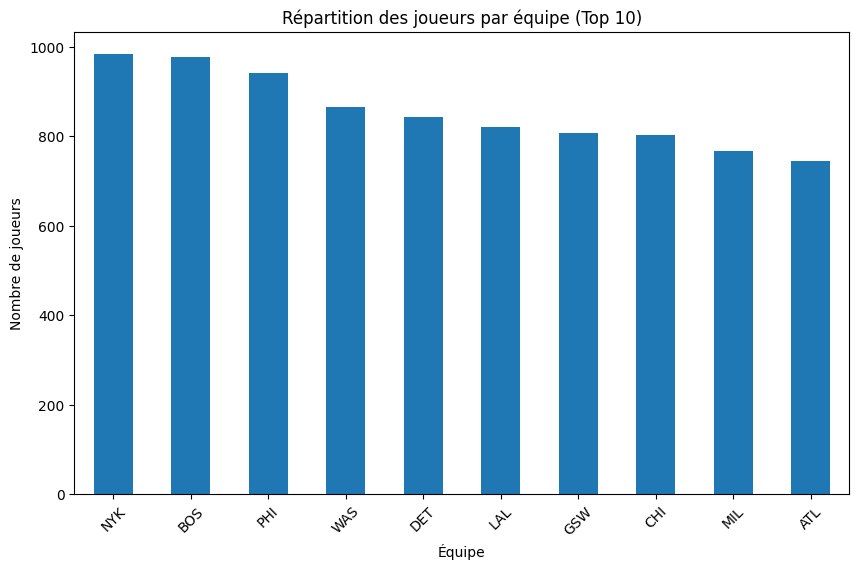

In [14]:
# Identifiez les équipes les plus fréquentes
top_teams = combined_df['Teams'].value_counts().head(10)

# Tracez un graphique de la répartition des équipes
plt.figure(figsize=(10, 6))
top_teams.plot(kind='bar')
plt.xlabel('Équipe')
plt.ylabel('Nombre de joueurs')
plt.title('Répartition des joueurs par équipe (Top 10)')
plt.xticks(rotation=45)
plt.show()

### Analyse des nationalités 

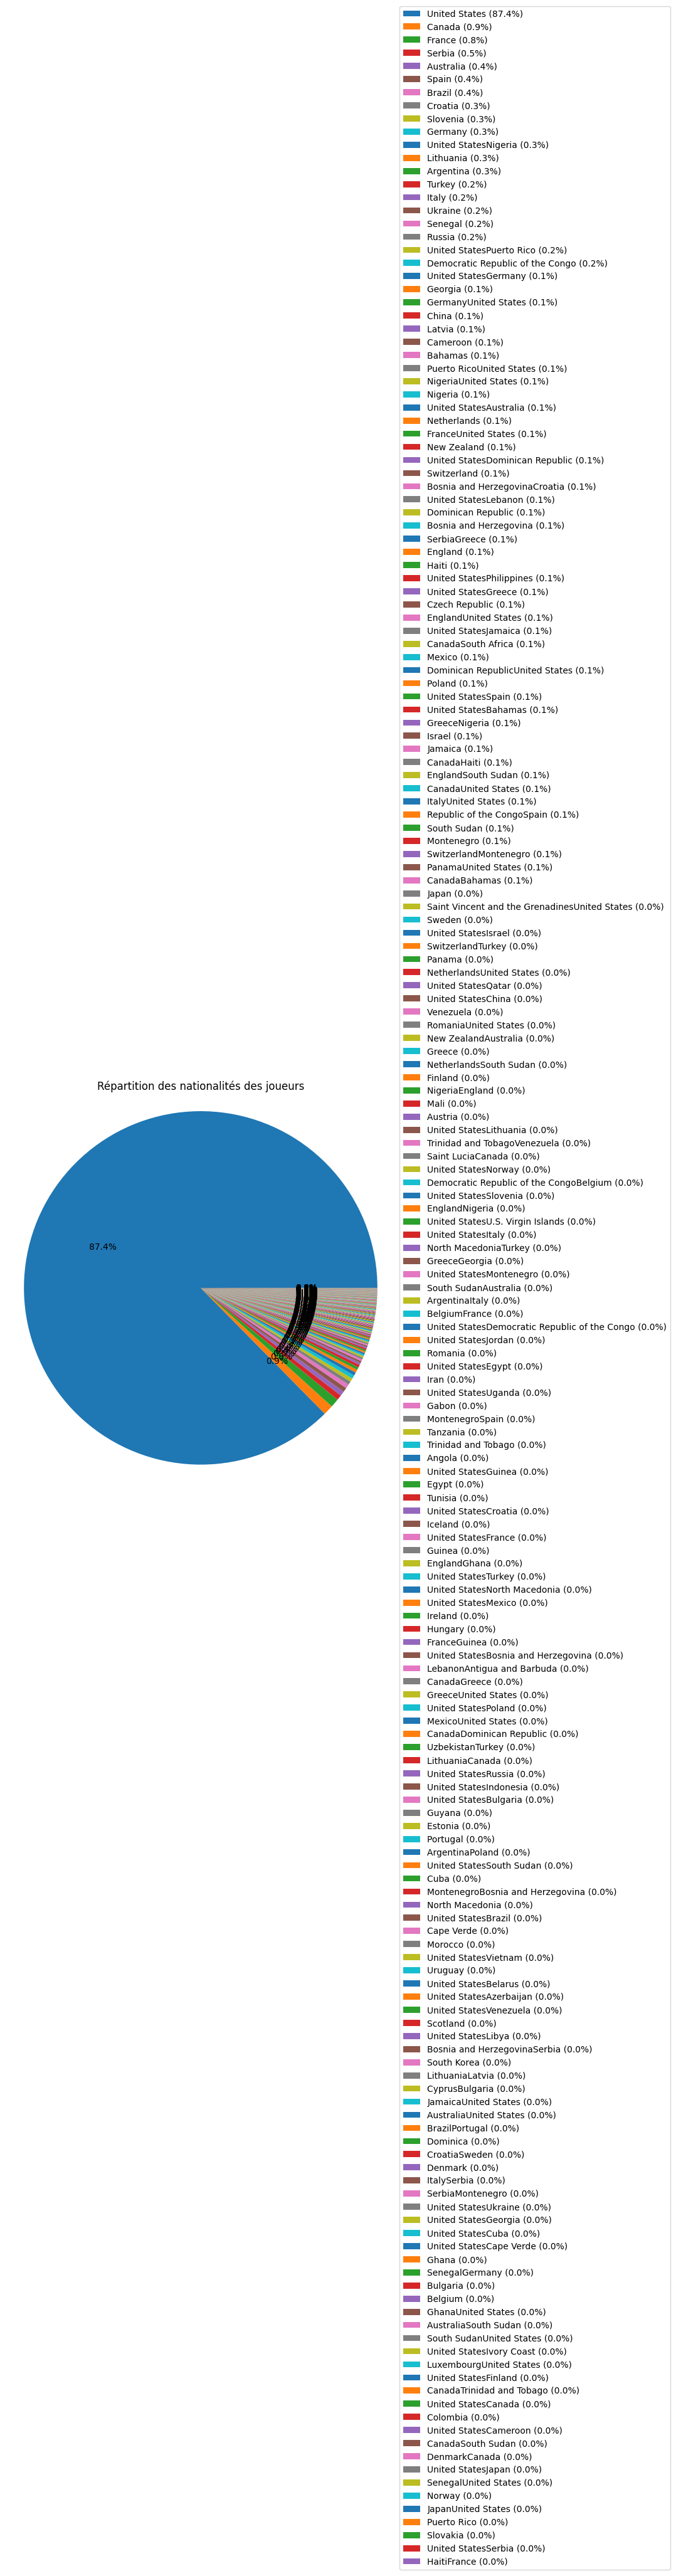

In [15]:
# Calculez le nombre de joueurs par nationalité et leur pourcentage
nationality_counts = combined_df['Nationality'].value_counts()
percentages = (nationality_counts / nationality_counts.sum()) * 100

# Créez un dataframe contenant les nationalités et les pourcentages
df_nationalities = pd.DataFrame({'Nationality': nationality_counts.index, 'Percentage': percentages})

# Tracez le diagramme circulaire sans légende
plt.figure(figsize=(8, 8))
plt.pie(df_nationalities['Percentage'], labels=None, autopct='%1.1f%%')
plt.title('Répartition des nationalités des joueurs')
plt.axis('equal')

# Affichez la légende séparément avec les pourcentages
labels = [f"{label} ({percent:.1f}%)"
          for label, percent in zip(df_nationalities['Nationality'], df_nationalities['Percentage'])]
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()